![Image](Prices-Soaring-Supplies-Vanishing-in-Popular-Migration-Destinations.jpg)

# "Predicting House Prices using OOP"

In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import phik

import warnings
from IPython.display import display, HTML, Javascript
display(HTML("<style>.container { width:60% !important; }</style>"))
pd.options.display.max_columns = None
warnings.filterwarnings('ignore') 
%autosave 60

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from catboost import CatBoostRegressor
from catboost import Pool
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import random
random.seed(42)

Autosaving every 60 seconds


![Image](2023-09-24_15-01-28.png)

![Image](2023-09-24_15-02-20.png)

In [2]:
# загрузка обучающей и тестовой выборки
train = pd.read_csv(r"D:\Загрузки\train.csv") 
train_copy = train.copy()

test = pd.read_csv(r"D:\Загрузки\test.csv") 

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<function matplotlib.pyplot.show(close=None, block=None)>

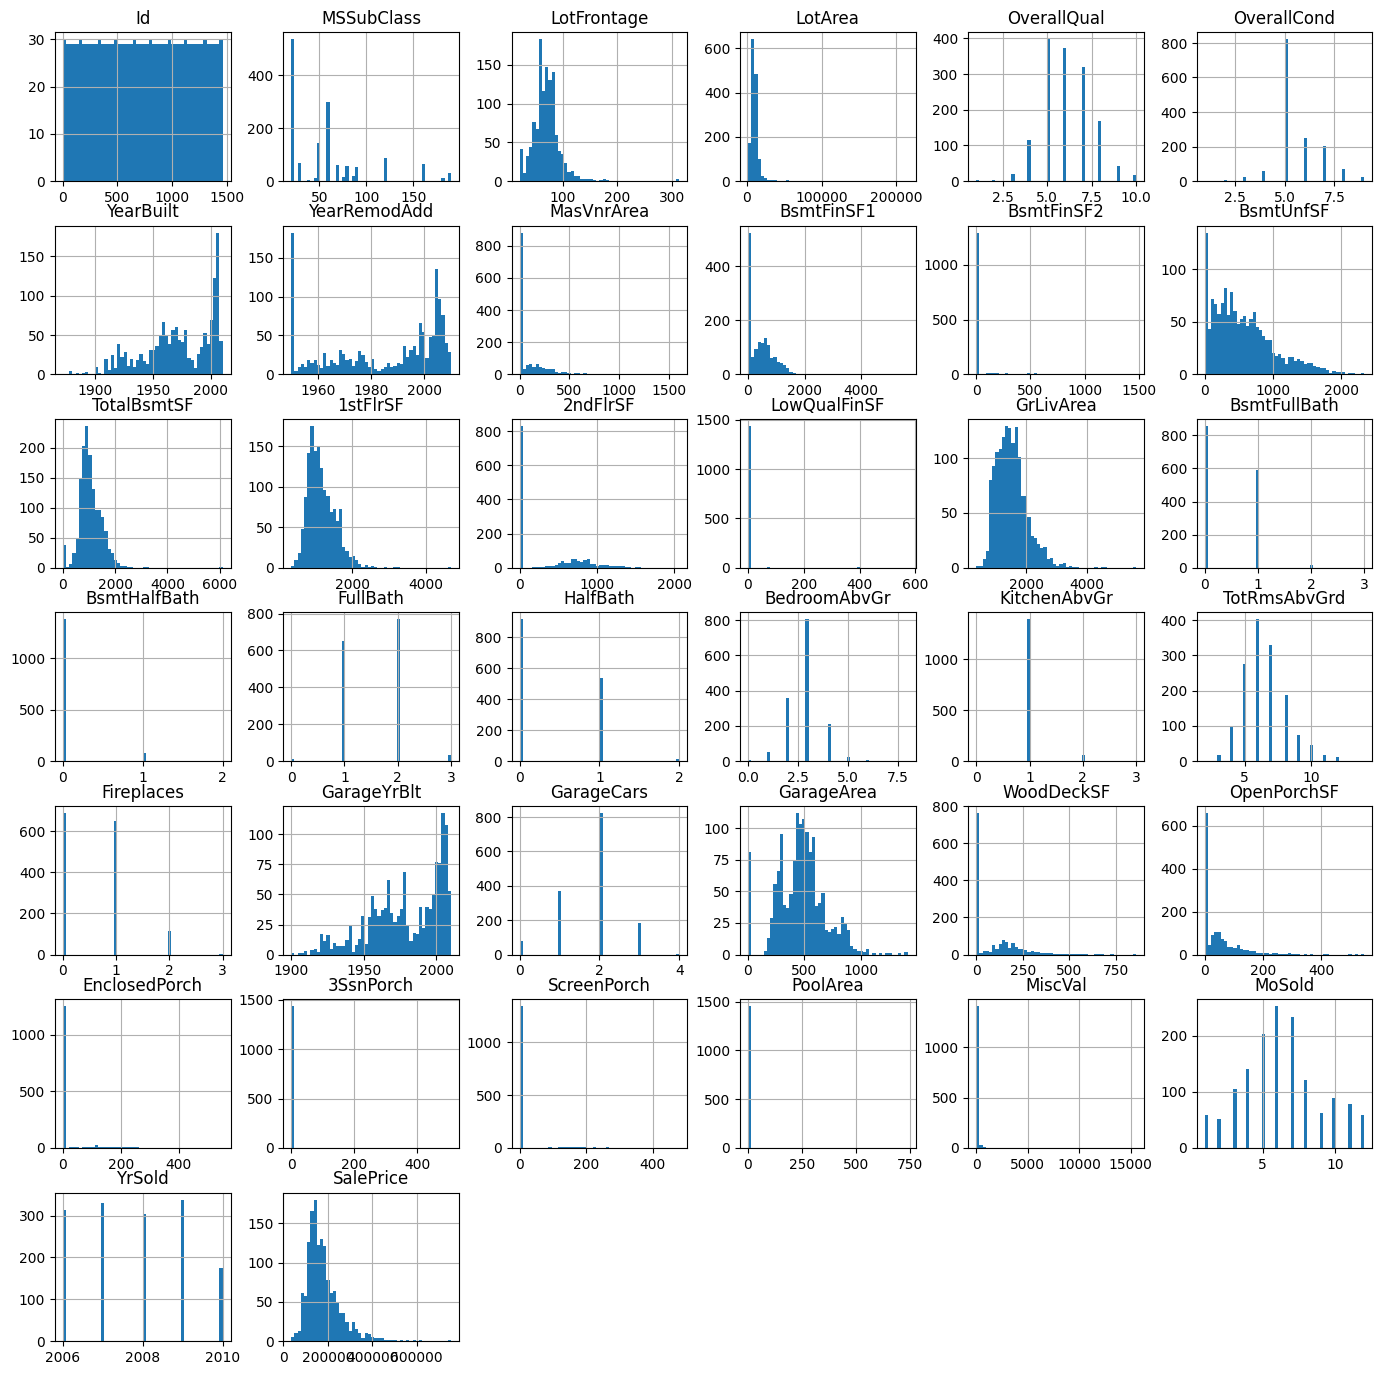

In [5]:
# распределение значений по признакам
train.hist(bins=50, figsize=(17, 17))
plt.show

In [6]:
# признаки с количеством пропусков
df_isna = []
for i in train.columns:
    if train[i].isna().sum() > 0:
        print(i, train[i].isna().sum())
        df_isna.append(i)

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [7]:
# распределение в столбцах с пропусками
for i in train[df_isna]:
    print(i)
    print(train[i].value_counts())
    print(' ')

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
 
Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64
 
MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
 
MasVnrArea
0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64
 
BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
 
BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
 
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
 
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
 
BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19

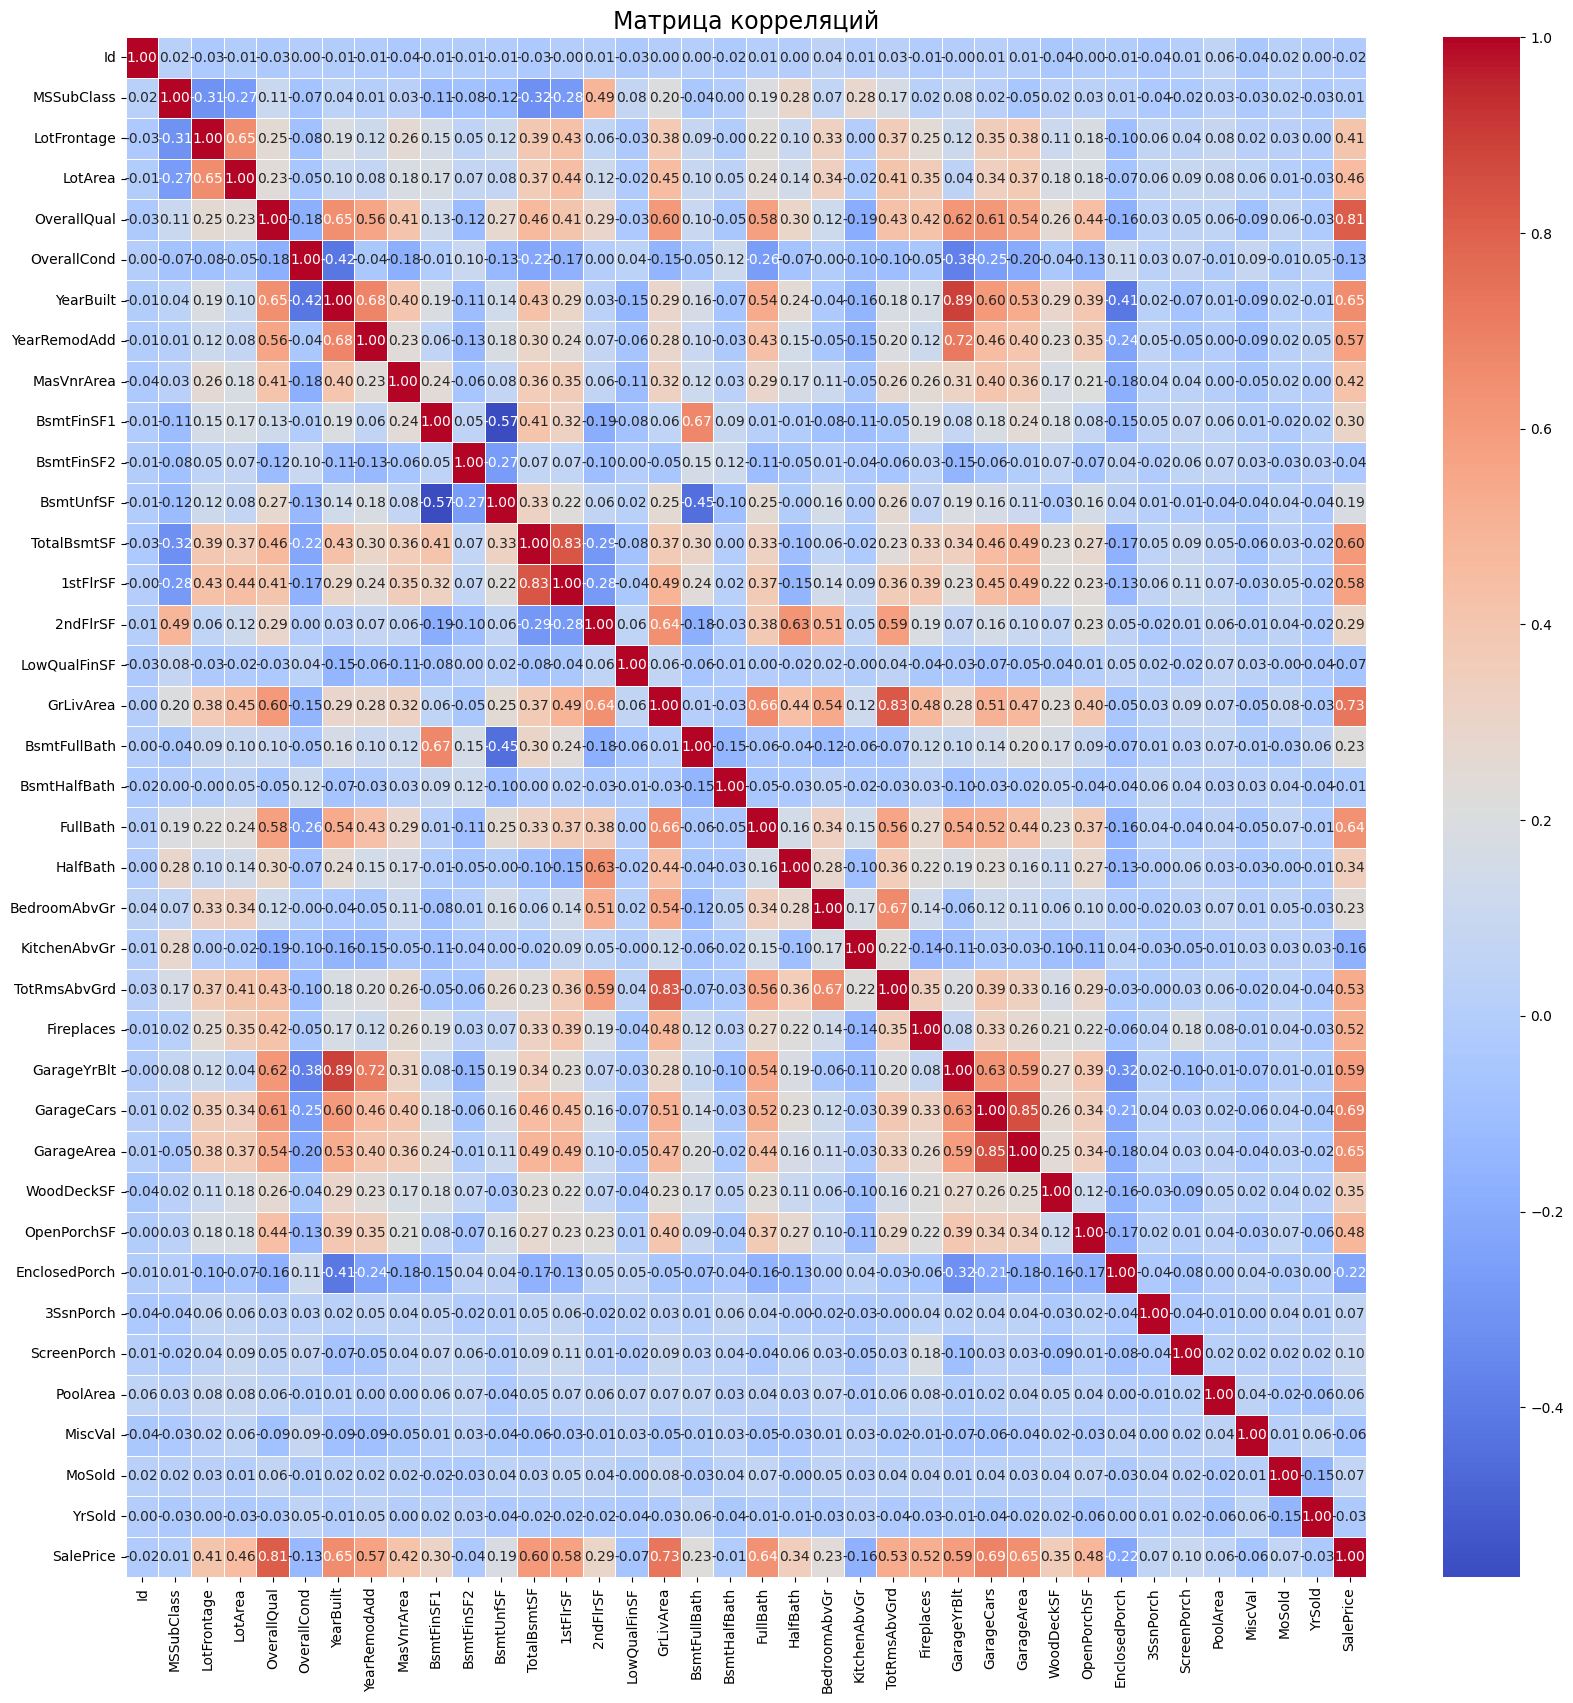

In [8]:
# матрица корреляции с коэффициентом Спирмена
numeric_columns = train.select_dtypes(include=np.number).columns
train_num = train[numeric_columns]
train_corr = train_num.corr(method='spearman')
plt.figure(figsize=(20, 20))
sns.heatmap(train_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций', fontsize=17)
plt.show()

interval columns not set, guessing: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


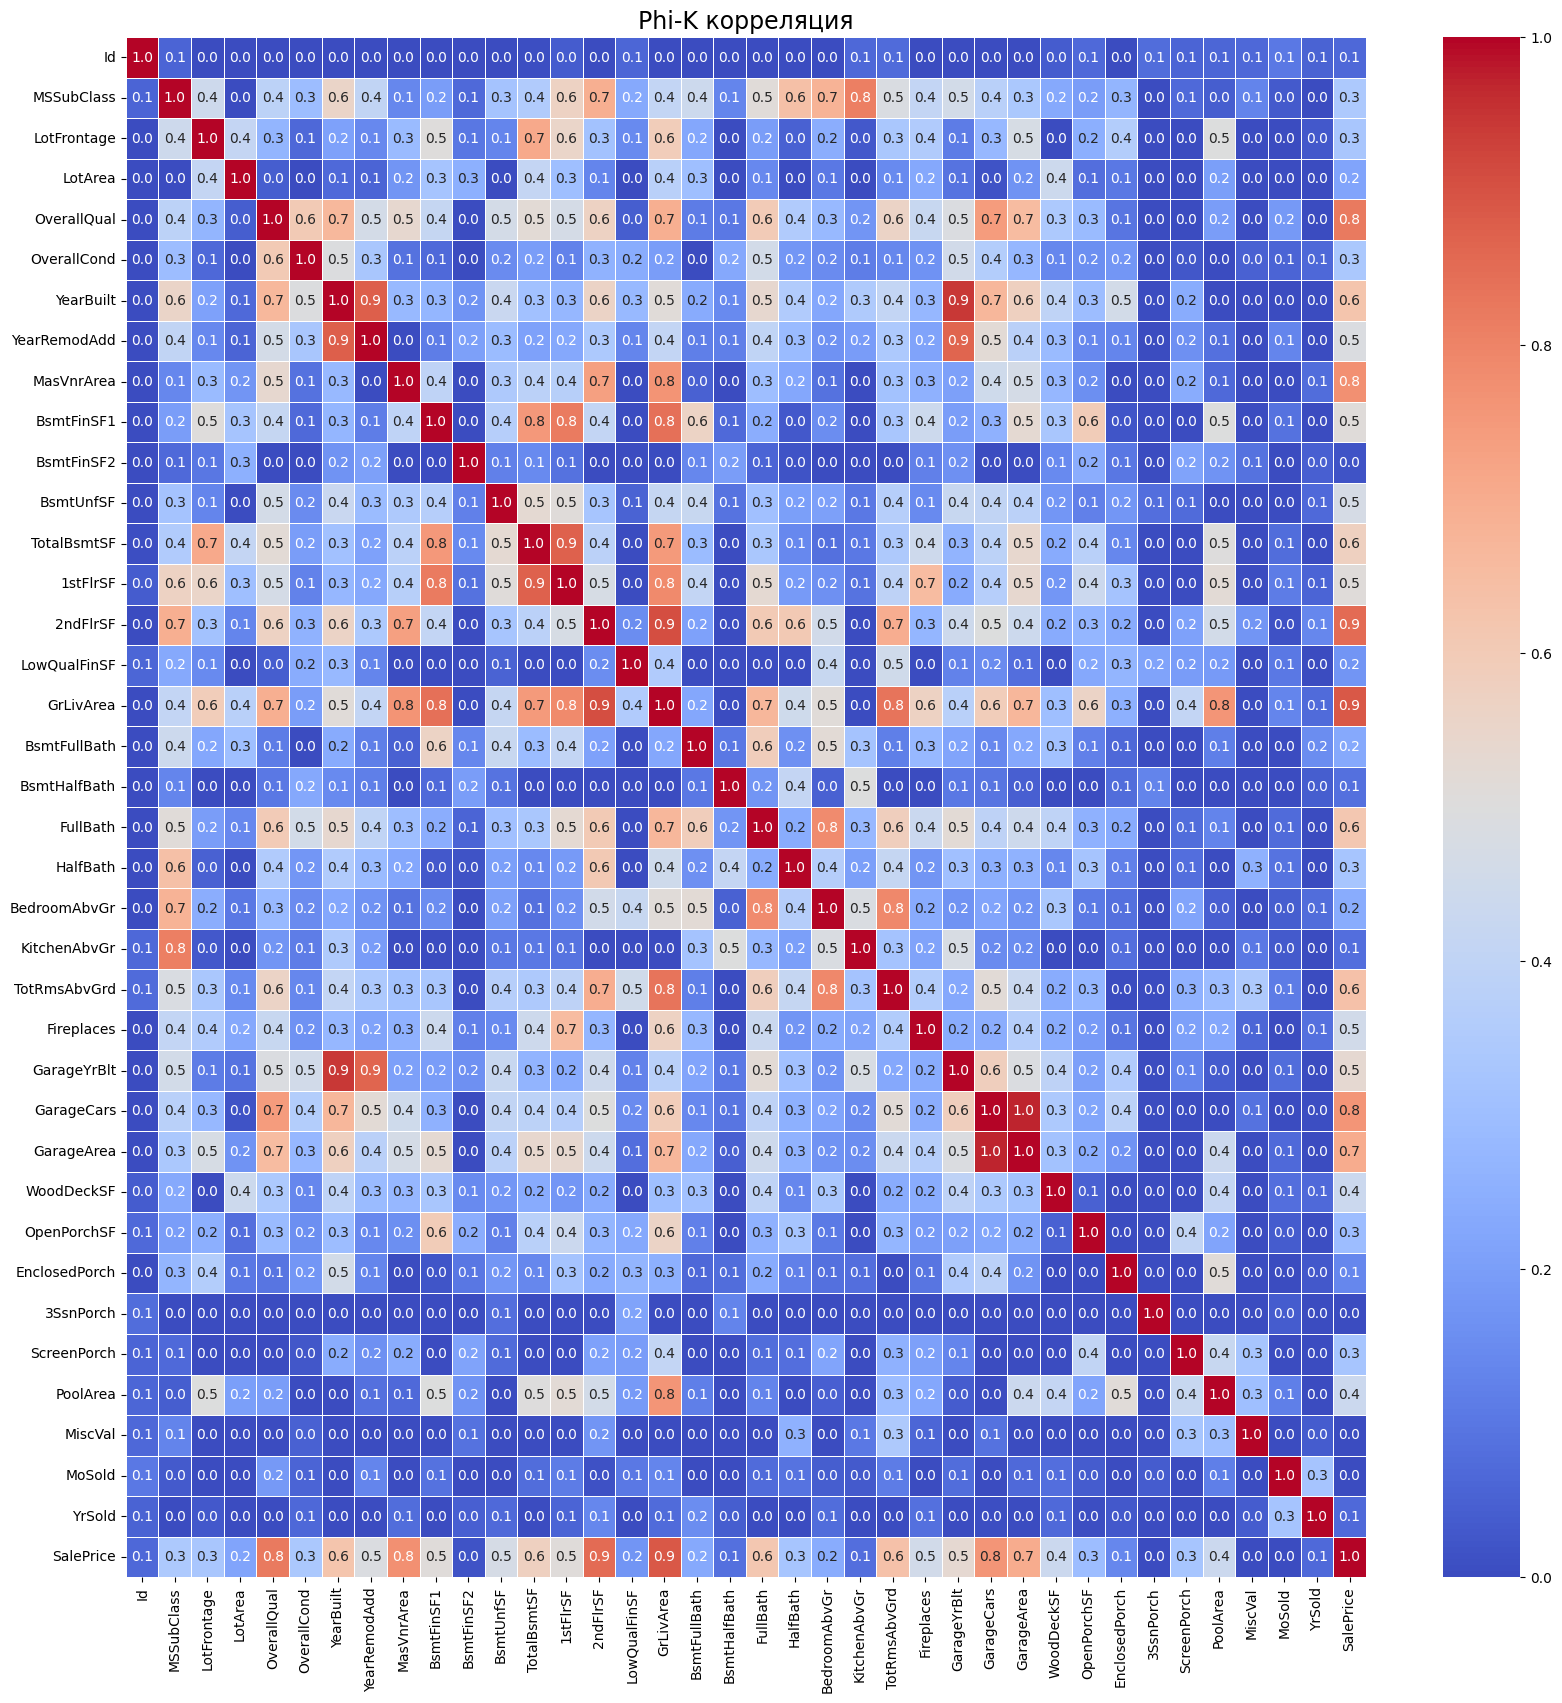

In [9]:
phi_k_corr = train_num.phik_matrix()
plt.figure(figsize=(20, 20))
sns.heatmap(phi_k_corr, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Phi-K корреляция', fontsize=17)
plt.show()

## Классы для обучения моделей и подбора гиперпараметров

In [10]:
# предобработка для условий моделей
X = train_copy.drop(columns='SalePrice')
y = train_copy['SalePrice']

# ставим заглушки в категориальных столбцах
categorical_columns = train_copy.select_dtypes(include='object').columns
X[categorical_columns] = X[categorical_columns].fillna('NA')

# кодируем OHE, заполняем пропуски средним и стандартизируем
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, X_train.select_dtypes(include=[np.number]).columns),
                                               ('cat', categorical_transformer, categorical_columns)]) 

In [11]:
%%time
# класс создания модели с поиском гиперпараметров по сетке
class GridSearchModelTrainer:
    def __init__(self, model, param_grid):
        self.model = model
        self.param_grid = param_grid
        self.grid_search = GridSearchCV(self.model, self.param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=100)
    # метод обучения, прогноза и оценки
    def train_evaluate(self, X_train, X_test, y_train, y_test):
        self.grid_search.fit(X_train, y_train)
        best_params = self.grid_search.best_params_
        best_model = self.grid_search.best_estimator_
        y_pred = best_model.predict(X_test)

        print("Лучшие параметры:", best_params)
        print('МЕТРИКИ МОДЕЛИ:')
        print('MAE:', round(mean_absolute_error(y_pred, y_test), 5))
        print('MAPE:', round(mean_absolute_percentage_error(y_pred, y_test), 5))
        print('MSE:', round(mean_squared_error(y_pred, y_test), 5))
        print('RMSE:', round(np.sqrt(mean_squared_error(y_pred, y_test))))
        print('R2:', round(r2_score(y_pred, y_test), 5))
        print('---------------------------------------------------------------------------')

# модель CatBoost с сеткой гиперпараметров
class CatBoostModelTrainerGridSearch(GridSearchModelTrainer):
    def __init__(self):
        model = Pipeline(steps=[('preprocessor', preprocessor), ('forecast', CatBoostRegressor(verbose=0, n_estimators=500))])
        param_grid = {'forecast__learning_rate': [0.1, 0.01], 'forecast__depth': range(1, 11)}
        super().__init__(model, param_grid)
        

# модель XGBoost с сеткой гиперпараметров
class XGBoostModelTrainerGridSearch(GridSearchModelTrainer):
    def __init__(self):
        model = Pipeline(steps=[('preprocessor', preprocessor), ('forecast', XGBRegressor())])
        param_grid = {'forecast__learning_rate': [0.1, 0.01], 'forecast__max_depth': range(1, 11)}
        super().__init__(model, param_grid)

# модель GradientBoostingRegressor с сеткой гиперпараметров
class GradientBoostingModelTrainerGridSearch(GridSearchModelTrainer):
    def __init__(self):
        model = Pipeline(steps=[('preprocessor', preprocessor), ('forecast', GradientBoostingRegressor())])
        param_grid = {'forecast__n_estimators': [100, 300, 500], 'forecast__max_depth': range(1, 11)}
        super().__init__(model, param_grid)
        

# модель RandomForest с сеткой гиперпараметров
class RandomForestModelTrainerGridSearch(GridSearchModelTrainer):
    def __init__(self):
        model = Pipeline(steps=[('preprocessor', preprocessor), ('forecast', RandomForestRegressor())])
        param_grid = {'forecast__n_estimators': [100, 300, 500], 'forecast__max_depth': range(1, 11)}
        super().__init__(model, param_grid)        

# создаём экземпляры классов для обучения и оценки моделей
catboost_trainer = CatBoostModelTrainerGridSearch()
xgboost_trainer = XGBoostModelTrainerGridSearch()
gradient_boosting_trainer = GradientBoostingModelTrainerGridSearch()
random_forest_trainer = RandomForestModelTrainerGridSearch()


print("Модель CatBoost:")
catboost_trainer.train_evaluate(X_train, X_test, y_train, y_test)

print("\nМодель XGBoost:")
xgboost_trainer.train_evaluate(X_train, X_test, y_train, y_test)

print("Модель GradientBoostingRegressor:")
gradient_boosting_trainer.train_evaluate(X_train, X_test, y_train, y_test)

print("\nМодель RandomForest:")
random_forest_trainer.train_evaluate(X_train, X_test, y_train, y_test)

Модель CatBoost:
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры: {'forecast__depth': 6, 'forecast__learning_rate': 0.1}
МЕТРИКИ МОДЕЛИ:
MAE: 15900.26833
MAPE: 8.68979
MSE: 727800464.41716
RMSE: 26978
R2: 0.87981
---------------------------------------------------------------------------

Модель XGBoost:
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры: {'forecast__learning_rate': 0.1, 'forecast__max_depth': 3}
МЕТРИКИ МОДЕЛИ:
MAE: 17168.03391
MAPE: 9.47945
MSE: 885534687.08056
RMSE: 29758
R2: 0.85105
---------------------------------------------------------------------------
Модель GradientBoostingRegressor:
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Лучшие параметры: {'forecast__max_depth': 2, 'forecast__n_estimators': 500}
МЕТРИКИ МОДЕЛИ:
MAE: 16817.0588
MAPE: 9.27006
MSE: 824283995.02082
RMSE: 28710
R2: 0.87159
---------------------------------------------------------------------------

Модель RandomFor

## Прогноз на контрольной выборке

In [11]:
# класс создания модели CatBoost
class CatBoostModelTrainer:
    def __init__(self, n_estimators=500, learning_rate=0.1, depth=5):
        self.model = Pipeline(steps=[('preprocessor', preprocessor), 
                                     ('forecast', CatBoostRegressor(n_estimators=n_estimators,
                                                                   learning_rate=learning_rate,
                                                                   depth=depth,
                                                                   verbose=0,
                                                                   random_state=42))])
    # метод обучения
    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)
    # метод прогнозирования
    def predict(self, X_test):
        return self.model.predict(X_test)
    # метод оценки модели
    def evaluate(self, y_true, y_pred):
        print('МЕТРИКИ МОДЕЛИ:')
        print('---------------')
        print('MAE:', round(mean_absolute_error(y_true, y_pred), 5))
        print('MAPE:', round(mean_absolute_percentage_error(y_true, y_pred), 5))
        print('MSE:', round(mean_squared_error(y_true, y_pred), 5))
        print('RMSE:', round(np.sqrt(mean_squared_error(y_true, y_pred))))
        print('R2:', round(r2_score(y_true, y_pred), 5))


# экземпляр класса с гиперпараметрами
catboost_trainer = CatBoostModelTrainer()
catboost_trainer.train(X_train, y_train)

# прогноз
y_pred = catboost_trainer.predict(X_test)

# оценка модели
catboost_trainer.evaluate(y_test, y_pred)

МЕТРИКИ МОДЕЛИ:
---------------
MAE: 15385.09814
MAPE: 9.1624
MSE: 671393405.54199
RMSE: 25911
R2: 0.91247


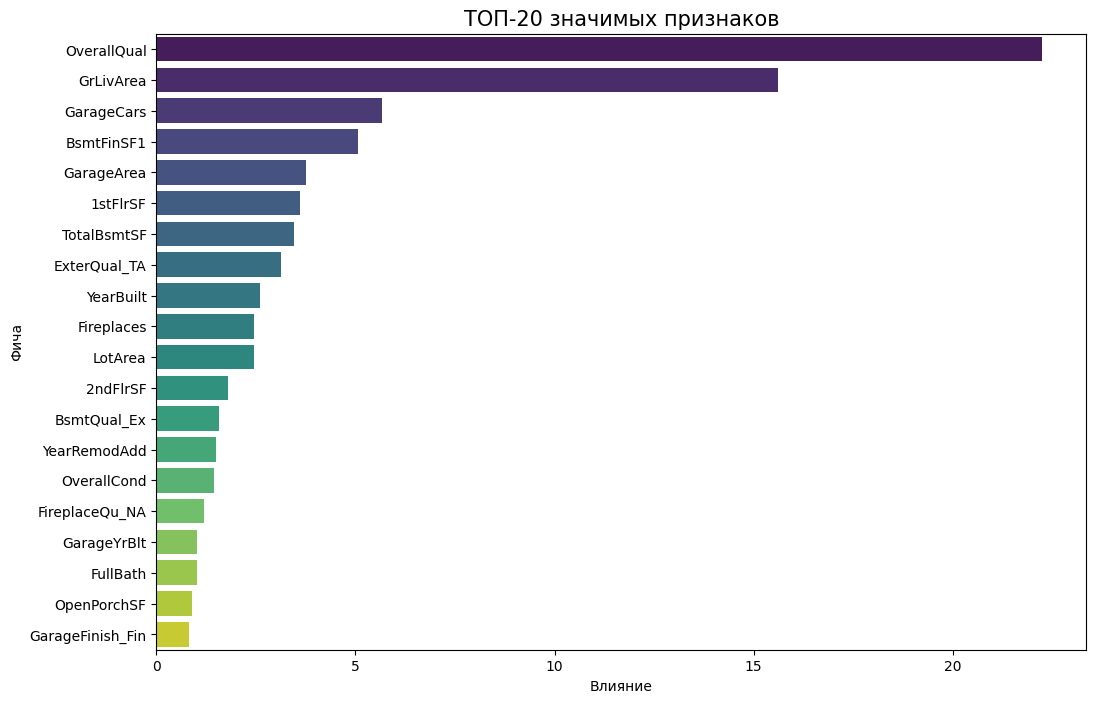

In [13]:
# датафрейм важности признаков
feature_importance = catboost_trainer.model.named_steps['forecast'].feature_importances_
categorical_features = catboost_trainer.model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(input_features=categorical_columns)
feature_names = np.concatenate([X_train.select_dtypes(include=[np.number]).columns, categorical_features])
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

# визуализация важности признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted, palette='viridis')
plt.xlabel('Влияние')
plt.ylabel('Фича')
plt.title('ТОП-20 значимых признаков', fontsize=15)
plt.show()

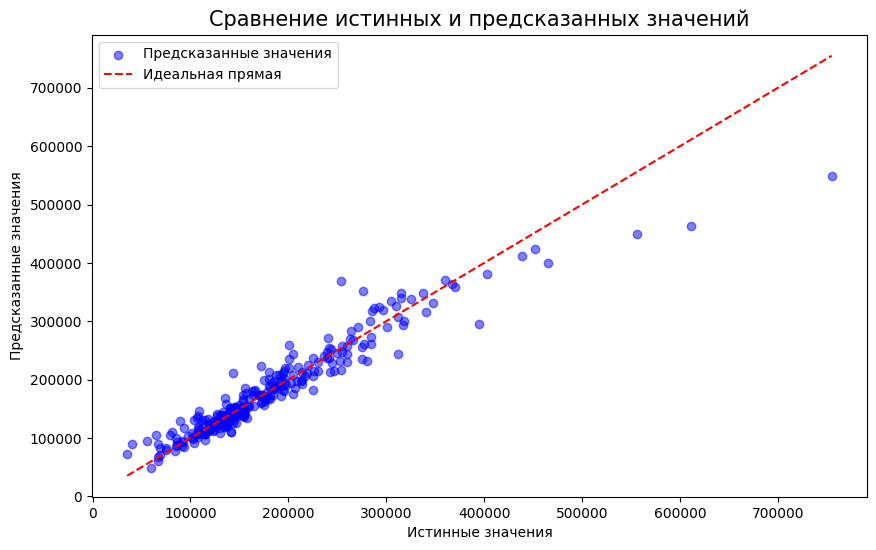

<Figure size 640x480 with 0 Axes>

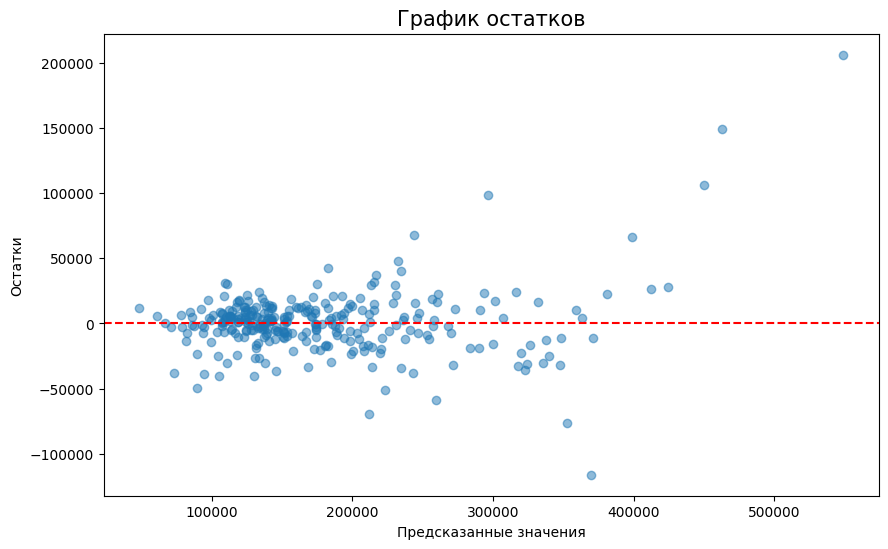

<Figure size 640x480 with 0 Axes>

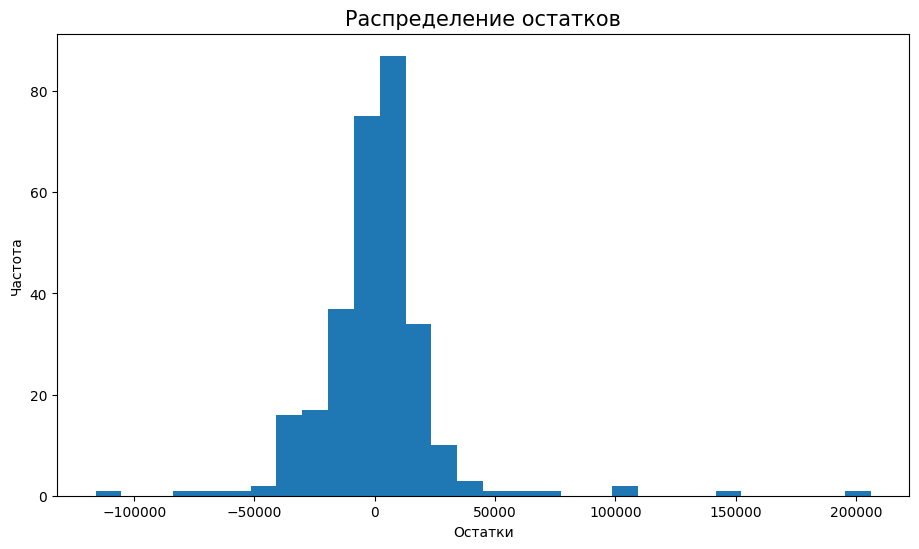

In [14]:
# визуализация истинных и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='b', label='Предсказанные значения')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', label='Идеальная прямая')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение истинных и предсказанных значений', fontsize=15)
plt.legend()
plt.show()
plt.clf()

# остатки
residuals = y_test - y_pred

# график остатков
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('График остатков', fontsize=15)
plt.show()
plt.clf()

# гистограмма остатков
plt.figure(figsize=(11, 6))
plt.hist(residuals, bins=30)
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.title('Распределение остатков', fontsize=15)
plt.show()

In [12]:
# предобработка контрольной выборки
X = test
categorical_columns = X.select_dtypes(include='object').columns
X[categorical_columns] = X[categorical_columns].fillna('NA')
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, X_train.select_dtypes(include=[np.number]).columns),
                                               ('cat', categorical_transformer, categorical_columns)]) 




# прогноз
test['SalePrice'] = catboost_trainer.predict(X)
result = test[['Id', 'SalePrice']]
result

,Id,SalePrice
0,1461,119709.273910
1,1462,159626.197953
2,1463,182697.254433
3,1464,187562.811451
4,1465,183695.575754
...,...,...
1454,2915,81576.188795
1455,2916,80153.640645
1456,2917,156925.192604
1457,2918,116761.672302


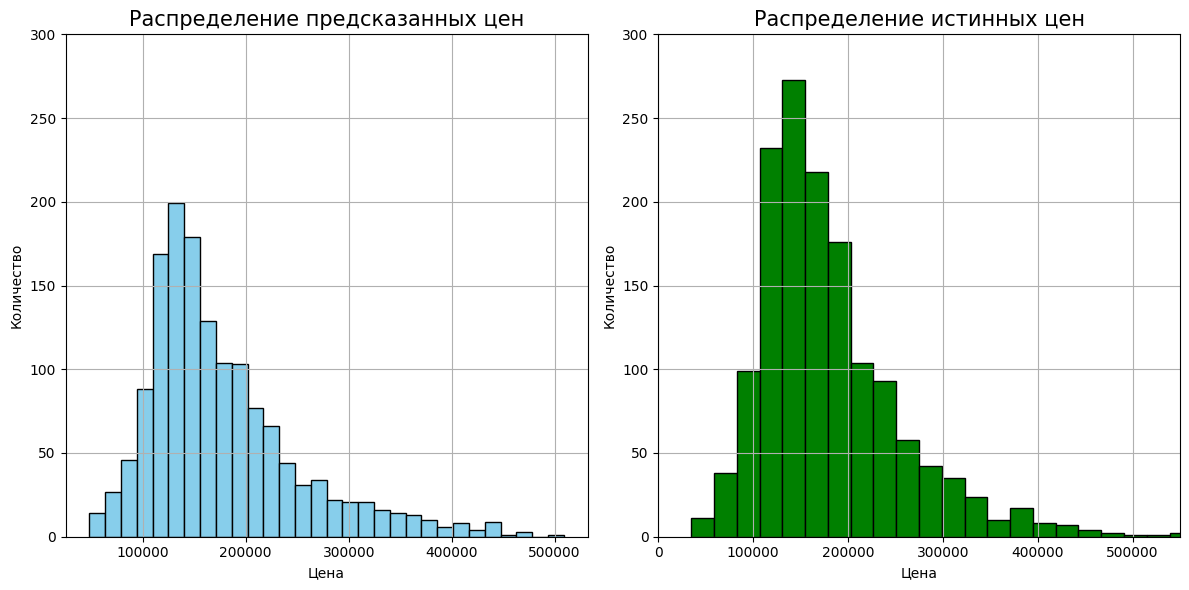

In [16]:
# распределение предсказанных значений
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
result['SalePrice'].hist(bins=30, edgecolor='black', color='skyblue')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.title('Распределение предсказанных цен', fontsize=15)
plt.ylim(0, 300)  

# распределение истинных значений
plt.subplot(1, 2, 2)
train['SalePrice'].hist(bins=30, edgecolor='black', color='green')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.title('Распределение истинных цен', fontsize=15)
plt.xlim(0, 550000)
plt.ylim(0, 300)  

plt.tight_layout()  
plt.show()